In [1]:
# Import dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output
import time

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read data
players = pd.read_csv('../Resources/players.csv')
plays = pd.read_csv('../Resources/plays.csv')

week1 = pd.read_csv('../Resources/week1.csv')
week2 = pd.read_csv('../Resources/week2.csv')
week3 = pd.read_csv('../Resources/week3.csv')
week4 = pd.read_csv('../Resources/week4.csv')
week5 = pd.read_csv('../Resources/week5.csv')
week6 = pd.read_csv('../Resources/week6.csv')
week7 = pd.read_csv('../Resources/week7.csv')
week8 = pd.read_csv('../Resources/week8.csv')

tracking = week1.append([
    week2,
    week3,
    week4,
    week5,
    week6,
    week7,
    week8,
])

In [3]:
# Slice tracking data for football position
football_tracking = tracking[tracking['nflId'].isna()]

In [4]:
# Find possession for player tracking data
player_tracking = tracking.loc[tracking['team'] != 'football'].copy()
player_tracking = player_tracking.merge(plays[['gameId', 'playId', 'possessionTeam']])
player_tracking['possession'] = player_tracking['team'] == player_tracking['possessionTeam']
player_tracking['possession'] = player_tracking['possession'].apply(lambda x: int(x))

In [5]:
# Merge football position by frame
positions = player_tracking[['gameId', 'playId', 'frameId', 'nflId', 'possession', 'o', 'x', 'y']].merge(
    football_tracking[['gameId', 'playId', 'frameId', 'x', 'y']],
    on=['gameId', 'playId', 'frameId'],
    suffixes=('', '_fb')
)

In [6]:
# Normalize player coordinates
positions['x_rel'] = positions['x_fb'] - positions['x']
positions['y_rel'] = positions['y_fb'] - positions['y']

In [7]:
# Define function to animate plot
def show_plot(gameId, playId, frameId=None):
    
    # Slice for play data
    play_df = positions[
        (positions['gameId'] == gameId) & \
        (positions['playId'] == playId)
    ]
    
    if frameId:
        play_df = positions[
            (positions['gameId'] == gameId) & \
            (positions['playId'] == playId) & \
            (positions['frameId'] == frameId)
        ]
    
    # Loop through each frame
    for f in range(play_df['frameId'].max()):
        
        # Initialize plot
        fig = plt.figure(figsize=(10, 10))
        ax = fig.add_subplot()
        
        # Slice for frame data
        frame = play_df[play_df['frameId'] == f + 1]
        
        # Generate scatter plot
        for i, r in frame.iterrows():
            plt.scatter(
                r['x_rel'],
                r['y_rel'],
                c='black',
                marker=(2, 2, r['o']),
                linestyle='None',
                s=120
            )
            plt.scatter(
                r['x_rel'],
                r['y_rel'],
                c='black',
                marker=(3, 0, r['o']),
                linestyle='None',
                s=120
            )

        plt.scatter(
            frame['x_rel'].append(pd.Series([0])),
            frame['y_rel'].append(pd.Series([0])),
            c=frame['possession'].append(pd.Series([2]))
        )
        
        # Format plot
        plt.xlim(-10,10)
        plt.ylim(-10,10)

        ax.set_aspect('equal', adjustable='box')

        plt.xlabel('')
        plt.ylabel('')

        plt.xticks([])
        plt.yticks([])

        ax = plt.gca()
        ax.axes.xaxis.set_ticklabels([])
        ax.axes.yaxis.set_ticklabels([])

        plt.title(f'gameId: {gameId} | playId: {playId} | frameId: {f + 1}')
        
        # Update display
        time.sleep(0.1)
        clear_output(wait=True)
        plt.show()

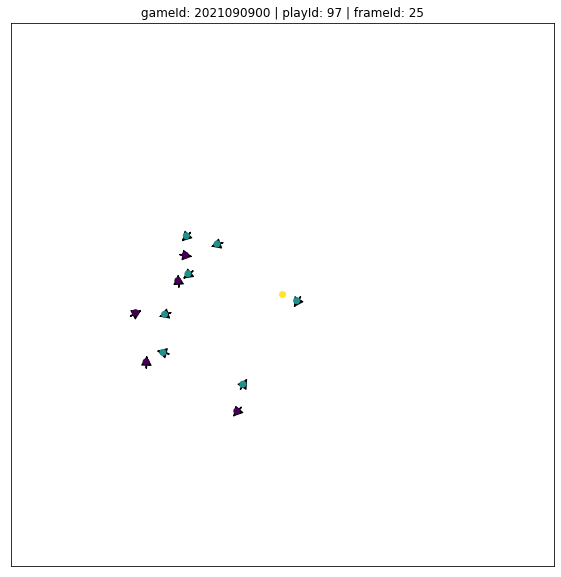

In [11]:
# Define play keys and call plot function
gameId = positions['gameId'].loc[0]
playId = positions['playId'].loc[0]

show_plot(gameId, playId, 25)